In [3]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import skrf as rf
from scipy.optimize import curve_fit

In [4]:
prop_cycle = rcParams['axes.prop_cycle']   
colors = prop_cycle.by_key()['color']
path=""    

Name of the Sonnet file "Transmon_g.son". Sonnet generates s2p files for the different gap parameters which are sweeped.

In [5]:
Transmon = []
for i in range(1,5): #example with 4 different parmeters
    file_name = path+"Transmon_g_param"+str(i)+".s2p"
    Transmon.append(rf.Network(file_name))

FileNotFoundError: [Errno 2] No such file or directory: 'Transmon_g_param1.s2p'

In [ ]:
freq=Transmon[0].frequency.f

In [6]:
Param=['5 $\\mu\\mathrm{m}$','15.8 $\\mu\\mathrm{m}$','50 $\\mu\\mathrm{m}$','158 $\\mu\\mathrm{m}$']
gap=[5*10**0,5*10**0.5,5*10**1,5*10**1.5]

Plot the transmission in dB scale

In [7]:
for i in range(4):
    Transmon[i].plot_s_db(1,0, label=Param[i])
    plt.legend(loc="upper left")
    plt.xlabel("frequency (GHz)")
    plt.ylabel("$|S_{21}| (dB)$")

IndexError: list index out of range

Define the fitting fuction to measure the coupling Q-factor and the resonance frequency

In [8]:
# Define the Lorantzienne function
def Resonance(x,Qc,f0):
    y = np.abs(1-1/(1+2*1j*Qc*((x-f0)/f0)))**2
    return y

In [9]:
Fit=np.zeros(shape=(4, 2))

To guess the initial values for the fit use the FWHM (Full width at half maximum)

In [10]:
for i in range(4):
    xdata=1e-9*freq
    ydata=np.abs(Transmon[i].s[:,1,0])**2
    index = np.argmin(ydata)  # Index of the minimum value
    min_value = ydata[index]  # Minimum value
    ind = np.where(ydata < ((1+min_value)/2))[0]  # Find indices where ydata < A
    if len(ind) > 0:  # Ensure there are valid indices
        delta_f = abs(xdata[ind.max()] - xdata[ind.min()])
    else:
        delta_f = 0  # Handle the case where no indices satisfy the condition
    Qc=xdata[index]/delta_f
    #Qc=Qt/(1-min_value)
    #Qi=(Qc*Qt)/(Qc-Qt)
    init_vals = [ Qc, xdata[index]]  
    Fit[i,:], covar =curve_fit(Resonance, xdata, ydata, p0=init_vals,bounds=(0, [ 1e6, 10]))

NameError: name 'freq' is not defined

In [11]:
ind_zoom=range(2250,2750)

for i in range(4):
 plt.plot(1e-9*freq,np.abs(Transmon[i].s[:,1,0]), label=Param[i])
 plt.legend(loc="upper left")
 plt.xlabel("frequency (GHz)")
 plt.ylabel("$|S_{21}| (dB)$")
plt.plot(1e-9*freq,Resonance(xdata, Qc, xdata[index]),linestyle='dashed', 
     color='black', linewidth=1)

NameError: name 'freq' is not defined

In [12]:
for i in range(4):
 plt.plot(1e-9*freq,np.unwrap((np.angle(Transmon[i].s[:,1,0]))), label=Param[i])
 plt.legend(loc="upper left")
 plt.xlabel("frequency (GHz)")
 plt.ylabel("$Arg(S_{21})$")

NameError: name 'freq' is not defined

Plot the transmission in the complex space

In [13]:
for i in range(4):
 plt.plot((np.real(Transmon[i].s[:,1,0])),(np.imag(Transmon[i].s[:,1,0])), label=Param[i])
 plt.legend(loc="upper left")
 plt.xlabel("$Re(S_{21})$")
 plt.ylabel("$Im(S_{21})$")   
ax = plt.gca() #you first need to get the axis handle
ax.set_aspect(1) #sets the height to width ratio to 1.5. 

IndexError: list index out of range

NameError: name 'xdata' is not defined

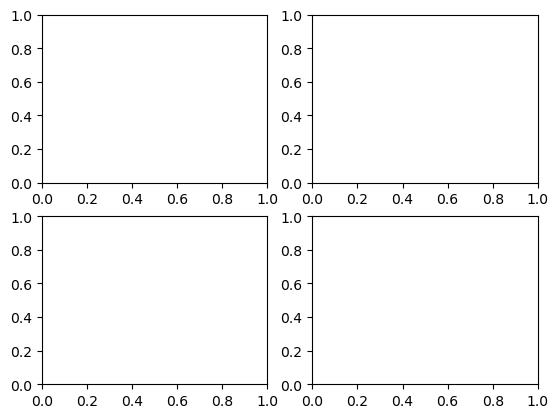

In [14]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(xdata,np.abs(Transmon[0].s[:,1,0])**2, color=colors[0])
axs[0, 0].set_title(Param[0])
axs[0, 0].plot(xdata,Resonance(xdata,Fit[0,0],Fit[0,1]),linestyle='dashed', 
     color='black', linewidth=1)
axs[0, 1].plot(xdata, np.abs(Transmon[1].s[:,1,0])**2, color=colors[1])
axs[0, 1].set_title(Param[1])
axs[0, 1].plot(xdata,Resonance(xdata,Fit[1,0],Fit[1,1]),linestyle='dashed', 
     color='black', linewidth=1)
axs[1, 0].plot(xdata, np.abs(Transmon[2].s[:,1,0])**2, color=colors[2])
axs[1, 0].set_title(Param[1])
axs[1, 0].plot(xdata,Resonance(xdata,Fit[2,0],Fit[2,1]),linestyle='dashed', 
     color='black', linewidth=1)
axs[1, 1].plot(xdata, np.abs(Transmon[3].s[:,1,0])**2, color=colors[3])
axs[1, 1].set_title(Param[3])
axs[1, 1].plot(xdata,Resonance(xdata,Fit[3,0],Fit[3,1]),linestyle='dashed', 
     color='black', linewidth=1)

axs[0, 0].set( ylabel="$|S_{21}| (dB)$")
axs[1, 0].set( ylabel="$|S_{21}| (dB)$")
axs[1, 0].set(xlabel="frequency (GHz)")
axs[1, 1].set(xlabel="frequency (GHz)")

Plot $Q_c$ and $f_0$ as a function of the gap distance

/tmp/ipykernel_23276/2793141229.py:14: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.tight_layout()


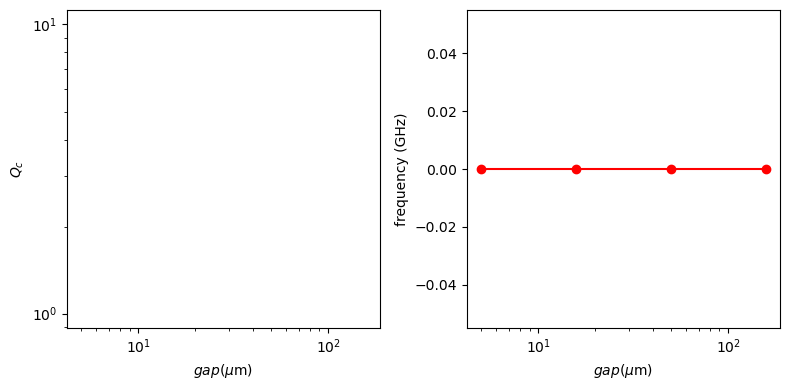

In [15]:
#fig6, axs6 = plt.subplots(1, 3)  # axs6 est un tableau 1D avec 3 éléments
fig6, axs6 = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
plt.tight_layout()
axs6[0].loglog(gap,Fit[:, 0],linestyle='-', marker='o', color='b')
axs6[1].semilogx(gap, Fit[:, 1],linestyle='-', marker='o', color='r')
#axs6[2].semilogx(gap, Fit[:, 2],linestyle='-', marker='o', color='g')
#axs6[2].set_ylim([8.05, 8.06])
#axs6[0].set(xlabel="$gap (\mu \mathrm{m})$")
#axs6[0].set(ylabel="$Q_i$")
axs6[0].set(xlabel="$gap (\\mu \\mathrm{m})$")
axs6[0].set(ylabel="$Q_c$")
axs6[1].set(xlabel="$gap (\\mu \\mathrm{m})$")
axs6[1].set(ylabel="frequency (GHz)")
plt.tight_layout()